**Import the libraries**

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

**Load , save and read the data**

In [228]:
data = {
    'Machine_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] * 10,
    'Vote_Choice': ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'D', 'A', 'B', 'C', 'D', 'A', 'B', 'C', 'D', 'A', 'B', 'C', 'D'] * 5,
    'Location': ['Loc1', 'Loc1', 'Loc1', 'Loc1', 'Loc2', 'Loc2', 'Loc2', 'Loc2', 'Loc3', 'Loc3', 'Loc3', 'Loc3', 'Loc1', 'Loc1', 'Loc1', 'Loc1', 'Loc2', 'Loc2', 'Loc2', 'Loc2'] * 5,
    'Voting_Duration': [10, 20, 30, 40, 15, 25, 35, 45, 50, 60, 12, 22, 32, 42, 18, 28, 38, 48, 55, 65] * 5,
    'Fraudulent': [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0] * 5
}
df=pd.DataFrame(data)
# Save to CSV
df.to_csv('evm_synthetic_fraud_detection.csv', index=False)
df2=pd.read_csv(r'evm_synthetic_fraud_detection.csv')
df2

,Machine_ID,Vote_Choice,Location,Voting_Duration,Fraudulent
0,1,A,Loc1,10,0
1,2,B,Loc1,20,1
2,3,C,Loc1,30,0
3,4,D,Loc1,40,0
4,5,A,Loc2,15,1
...,...,...,...,...,...
95,6,D,Loc1,28,0
96,7,A,Loc2,38,1
97,8,B,Loc2,48,0
98,9,C,Loc2,55,1


**Determining the shape**

In [229]:
df2.shape

(100, 5)

**Determining the datatypes**

In [230]:
df2.dtypes

Machine_ID          int64
Vote_Choice        object
Location           object
Voting_Duration     int64
Fraudulent          int64
dtype: object

**PreProcessing the data**

In [231]:
def preprocess_data(df):
    # Encode categorical features
    label_encoders = {}
    categorical_features = ['Machine_ID','Vote_Choice', 'Location']
#Encoding the categorical values into numerical
    for feature in categorical_features:
        le = LabelEncoder()
        df2[feature] = le.fit_transform(df2[feature].astype(str))
        label_encoders[feature] = le

    return df2, label_encoders

df2, label_encoders = preprocess_data(df2)
df2

,Machine_ID,Vote_Choice,Location,Voting_Duration,Fraudulent
0,0,0,0,10,0
1,2,1,0,20,1
2,3,2,0,30,0
3,4,3,0,40,0
4,5,0,1,15,1
...,...,...,...,...,...
95,6,3,0,28,0
96,7,0,1,38,1
97,8,1,1,48,0
98,9,2,1,55,1


**Splitting the data into training and test set**

In [232]:
# Split the data into features and target
X = df2.drop('Fraudulent',axis=1)
y = df2['Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Standard Scaling**

In [233]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Applying RandomForestClassifier**

In [234]:
# Initialize and train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [235]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [236]:
# giving the accuracy score and Classifiaction report for RandomForestClassifier
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [237]:
#Determining the Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

Confusion Matrix:


array([[18,  0],
       [ 0, 12]], dtype=int64)

**Plot the Confusion matrix**

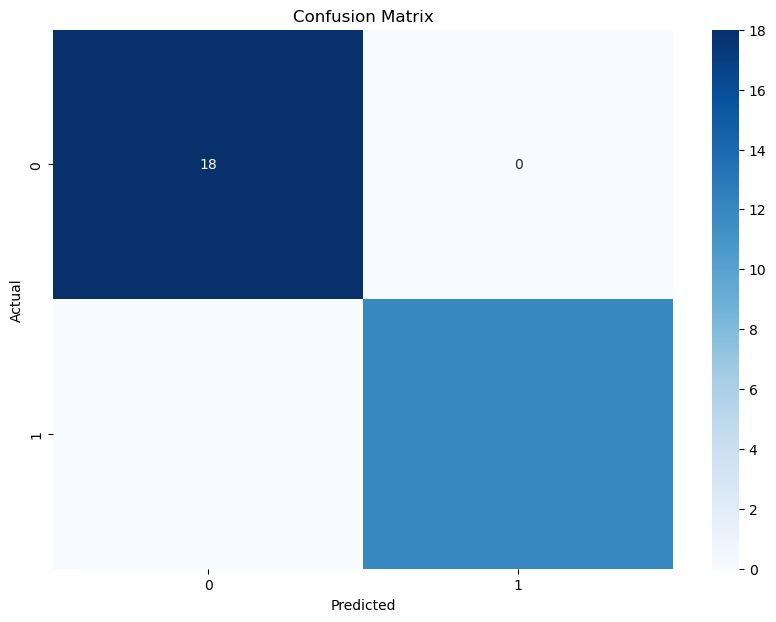

In [238]:
# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**Obtained LogisticRegressionScore**

In [239]:
from sklearn.linear_model import LogisticRegression
def get_score(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [240]:
get_score(LogisticRegression(),X_train,y_train,X_test,y_test) # getting LogisticRegression Score

0.6

**Build AdaBoostClassifier**

In [241]:
from sklearn.ensemble import AdaBoostClassifier
#create adaboost classifier object
abc=AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=0)
#Train AdaBoost Classifier
model1=abc.fit(X_train,y_train)
#predict the response for test data
y_pred=model1.predict(X_test)

In [242]:
from sklearn.metrics import accuracy_score
print("model accuracy score:",accuracy_score(y_test,y_pred))

model accuracy score: 1.0


**Build XGBoostClassifier**

In [243]:
from xgboost import XGBClassifier
#create XG classifier object
xgb=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
#Train XGBoost Classifier
model3=xgb.fit(X_train,y_train)
#predict the response for test data
y_pred=model3.predict(X_test)

In [244]:
from sklearn.metrics import accuracy_score
print("model accuracy score:",accuracy_score(y_test,y_pred))

model accuracy score: 1.0


**Applying Cross Validation Score**

In [245]:
from sklearn.model_selection import cross_val_score

xgb_cv_scores = cross_val_score(xgb, X_train, y_train, cv=5)
rf_cv_scores = cross_val_score(model, X_train, y_train, cv=5)
ada_cv_scores = cross_val_score(abc, X_train, y_train, cv=5)

print("xgb Cross-Validation Scores:", xgb_cv_scores)
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("AdaBoost Cross-Validation Scores:", ada_cv_scores)

xgb Cross-Validation Scores: [1.         1.         1.         0.92857143 0.85714286]
Random Forest Cross-Validation Scores: [1.         1.         1.         0.92857143 0.85714286]
AdaBoost Cross-Validation Scores: [1.         1.         1.         0.92857143 0.85714286]


In [247]:
df2=pd.DataFrame(data)
def get_fraudulent_value(machine_id, vote_choice, location , voting_duration):
  """
  Returns the fraudulent value for a given vote.

  Args:
    machine_id: The ID of the machine.
    vote_choice: The vote choice.
    voting_duration: The voting duration.
    location: The voting location.

  Returns:
    The fraudulent value (0 or 1).
  """

  # Find the index of the vote in the dataset
  for i, row in enumerate(zip(df2['Machine_ID'], df2['Vote_Choice'], df2['Location'], df2['Voting_Duration'])):
    if row == (machine_id, vote_choice, location, voting_duration):
      return df2['Fraudulent'][i]

  # If not found, return None or handle the case accordingly
  return None  # Or raise an exception, return a default value, etc.
# Example usage
machine_id = int(input("Enter Machine ID: "))
vote_choice = input("Enter Vote Choice (A, B, C, D): ")
location = input("Enter Location (Loc1, Loc2, Loc3): ")
voting_duration = float(input("Enter Voting Duration: "))

result = get_fraudulent_value(machine_id, vote_choice, location, voting_duration)
print(f'The voting record is: **{result}**')
#Conditions for predicting the fraud
if(result==1):
    print("Fraud detected")
else:
    print("No Fraud Detected")

Enter Machine ID:  5
Enter Vote Choice (A, B, C, D):  A
Enter Location (Loc1, Loc2, Loc3):  Loc2
Enter Voting Duration:  15


The voting record is: **1**
Fraud detected
